# **Modelo de detección de cáncer cervical en muestras de tejido celular utilizando Máquinas de Soporte Vectorial:** Monografía presentada​ para optar al título de ​Especialista en Analítica y Ciencia de Datos​

**Estudiantes:** <br>
Daniel Alberto López Sánchez, Ing Electrónico. e-mail: daniel.lopez6@udea.edu.co <br>
July Andrea Muñoz Lopera, Ing Industrial. e-mail: july.munoz@udea.edu.co

**Asesora:** <br>
Maria Bernarda Salazar Sánchez, PhD. e-mail: bernarda.salazar@udea.edu.co

<br>
Universidad de Antioquia <br>
​Facultad de Ingeniería​ <br>
​​Especialización en Analítica y Ciencia de Datos​ <br>
​​Medellín, Antioquia, Colombia​ <br>
2023

# Objetivo
---
El objetivo de este notebook es analizar la distribución de las características extraídas de las imágenes del dataset SIPaKMeD, las cuales fueron obtenidas previamente en el notebook "Extracción de Características". Se llevará a cabo un análisis de datos atípicos utilizando el método de Local Outlier Factor, debido a sus ventajas para trabajar con datos en múltiples dimensiones.

# Descarga de Característica Documento CSV
---
En el notebook previo, se realizaron la extracción de características de las imágenes del dataset SIPaKMeD y se guardaron en un archivo CSV en la subcarpeta "tmp" del repositorio "MonografiaDataScience", con el nombre "color_statistics.csv". En este nuevo notebook, se utilizará este archivo como base para realizar el análisis de datos atípicos.

Para la descarga del repositorio, se usa el comando ```git clone https://github.com/Alberto-San/MonografiaDataScience```

In [1]:
!git clone https://github.com/Alberto-San/MonografiaDataScience

Cloning into 'MonografiaDataScience'...
remote: Enumerating objects: 175, done.
remote: Counting objects: 100% (175/175), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 175 (delta 67), reused 144 (delta 42), pack-reused 0
Receiving objects: 100% (175/175), 22.51 MiB | 10.28 MiB/s, done.
Resolving deltas: 100% (67/67), done.


Leyendo el archivo CSV que contiene las características extraídas

In [2]:
import pandas as pd 

path_color_images = "./MonografiaDataScience/tmp/color_statistics.csv"
table_features = pd.read_csv(path_color_images)
table_features

,class,image_path,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21
0,im_Superficial-Intermediate,/content/sipakmed/im_Superficial-Intermediate/...,183.323388,0.018020,0.028836,-917.959535,6.254622,20.068231,184.0,139.200186,...,23.040231,139.0,72.627459,0.013979,0.021424,5595.144120,6.293955,22.126087,67.0,124.324153
1,im_Superficial-Intermediate,/content/sipakmed/im_Superficial-Intermediate/...,186.047686,0.023454,0.079213,16033.627130,6.776816,39.819733,179.0,148.752417,...,41.342971,141.0,185.230083,0.021922,0.083143,-30604.651207,6.762042,34.669430,198.0,163.911240
2,im_Superficial-Intermediate,/content/sipakmed/im_Superficial-Intermediate/...,178.068636,0.022947,0.045504,-7910.307876,6.431249,24.560752,178.0,155.596777,...,26.812060,153.0,157.221446,0.019700,0.070152,-8125.133171,6.636741,30.095384,155.0,158.644256
3,im_Superficial-Intermediate,/content/sipakmed/im_Superficial-Intermediate/...,190.379236,0.029844,0.057215,-4221.604000,6.234412,20.254164,189.0,156.144607,...,18.226508,156.0,232.297087,0.025277,0.024731,-5571.572892,4.327503,10.288443,234.0,182.817624
4,im_Superficial-Intermediate,/content/sipakmed/im_Superficial-Intermediate/...,184.511240,0.024703,0.027122,-1554.618361,6.038195,17.793677,182.0,143.531488,...,22.069638,139.0,75.662645,0.018575,0.017502,1176.697080,5.739558,14.429489,72.0,127.906033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4044,im_Koilocytotic,/content/sipakmed/im_Koilocytotic/im_Koilocyto...,145.467169,0.013118,0.020039,1002.920947,6.215896,18.465449,145.0,162.778946,...,16.724765,164.0,199.298430,0.012024,0.001649,-144.132186,4.461137,5.755065,200.0,171.725145
4045,im_Koilocytotic,/content/sipakmed/im_Koilocytotic/im_Koilocyto...,153.119070,0.008760,0.023177,30218.789883,7.161531,44.634528,148.0,131.797934,...,50.459878,124.0,116.790971,0.007939,0.032149,44807.749176,7.110522,43.822961,108.0,129.744401
4046,im_Koilocytotic,/content/sipakmed/im_Koilocytotic/im_Koilocyto...,106.992107,0.008553,0.039428,53835.382760,7.053690,41.447707,94.0,134.266570,...,58.186251,116.0,114.638657,0.008171,0.070147,168772.638679,7.101753,56.548571,93.0,125.291756
4047,im_Koilocytotic,/content/sipakmed/im_Koilocytotic/im_Koilocyto...,111.661777,0.007846,0.027666,10323.250029,6.414168,24.813317,104.0,90.348120,...,28.378870,82.0,124.020289,0.007445,0.050579,5653.609055,6.662602,28.633825,119.0,102.844773


## Análisis de estadísticos básicos
---

In [3]:
table_features.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21
count,4049.000000,4049.000000,4049.000000,4049.000000,4049.000000,4049.000000,4049.000000,4049.000000,4049.000000,4049.000000,...,4049.000000,4049.000000,4049.000000,4049.000000,4049.000000,4049.000000,4049.000000,4049.000000,4049.000000,4049.000000
mean,156.325574,0.013050,0.050097,4937.435138,6.274991,28.444748,154.467152,132.117775,0.014407,0.067247,...,31.419329,129.097555,135.178617,0.011919,0.055613,1595.657946,6.463401,31.622616,133.915658,135.793304
std,47.200665,0.006448,0.069130,36217.317387,0.730330,13.414944,50.284998,40.053187,0.006888,0.064934,...,11.709597,42.639157,41.219059,0.005760,0.051680,43740.354941,0.582921,11.665083,47.090754,37.045545
min,32.180145,0.001120,0.001113,-223977.273661,0.447899,3.332016,30.000000,38.393285,0.004412,0.000841,...,4.458147,38.000000,35.002831,0.001759,0.001292,-244531.850043,1.100130,5.755065,29.000000,47.520124
25%,122.668864,0.007893,0.009755,-5855.160978,5.899003,18.524319,118.000000,101.389215,0.008953,0.017568,...,22.781303,96.000000,104.870496,0.007378,0.018657,-14884.273243,6.153852,23.180675,101.000000,106.340971
50%,161.878223,0.011377,0.027184,-367.480824,6.346107,26.092095,160.000000,131.496260,0.012616,0.048946,...,29.973123,128.000000,135.945909,0.010153,0.040533,-1319.954314,6.564285,31.009116,135.000000,133.866074
75%,189.791550,0.017283,0.061226,8078.139421,6.783356,35.564597,190.000000,161.425103,0.019040,0.097459,...,38.831991,160.000000,163.001364,0.015499,0.075188,13361.744084,6.887963,39.073903,164.000000,164.516818
max,254.171756,0.034033,0.803293,366650.108983,7.621974,84.488579,255.000000,237.302521,0.051348,0.463266,...,83.300989,255.000000,253.127541,0.039157,0.409219,484126.083913,7.561561,90.110651,255.000000,232.263574


Se observa que los 4049 registros de características extraídas presentan una gran variedad de medias, mínimos, máximos y desviaciones estándares en cada una de las características. Debido a esta disparidad, analizar los datos mediante un diagrama de cajas y bigotes se vuelve complejo, ya que los datos no están en la misma escala y se tienen 22 dimensiones.

# Análisis de Datos Atípicos con el Método de Local Outlier Factor (LOF)
---
El método Local Outlier Factor (LOF) es un algoritmo de detección de anomalías utilizado en aprendizaje automático y minería de datos. Su objetivo es identificar instancias atípicas (outliers) en un conjunto de datos utilizando la densidad de puntos en su vecindario local. El método LOF se basa en la idea de que los puntos atípicos se encuentran en regiones de baja densidad dentro del conjunto de datos, mientras que los puntos normales están rodeados de otros puntos normales. El algoritmo evalúa la densidad local de cada punto y compara esa densidad con la de sus vecinos cercanos para determinar si el punto es un outlier.

Para llevar a cabo el análisis de datos atípicos, se utiliza el módulo PreprocessorAPI.PreprocessorAPI.getOutliersLOF que se encuentra en el repositorio MonografiaDataScience [https://github.com/Alberto-San/MonografiaDataScience/blob/main/PreprocessorAPI/getOutliersLOF.py]. En este módulo, se tiene predefinida la funcion run_outliers_analisis, la cual, guarda los modelos de lof de detección de datos atípicos en formato ```lof_im_<<class>>.joblib``` en el entorno de Colab, en la carpeta MonografiaDataScience/tmp. De igual manera se guardan los datos atípicos de cada una de las clases en la misma carpeta, en formato ```lof_im_<<class>>.csv```

In [4]:
from MonografiaDataScience.PreprocessorAPI.getOutliersLOF import *

path_color_images = "./MonografiaDataScience/tmp/color_statistics.csv"
class_label = "class"
path_label = "image_path"

run_outliers_analisis(path_csv=path_color_images, class_field=class_label, path_field=path_label)

# Visualización de Datos Atípicos por Clase
---
Una vez obtenidos los datos atípicos, se visualiza su distribucion haciendo uso de la tecnica t-sne, la cual, es una técnica de reducción de dimensionalidad no lineal utilizada para visualizar y explorar datos complejos de alta dimensionalidad en un espacio bidimensional o tridimensional. La técnica T-SNE funciona al mapear los puntos de alta dimensionalidad a un espacio de menor dimensionalidad, generalmente dos o tres dimensiones, de modo que las relaciones entre los puntos se conserven lo mejor posible.

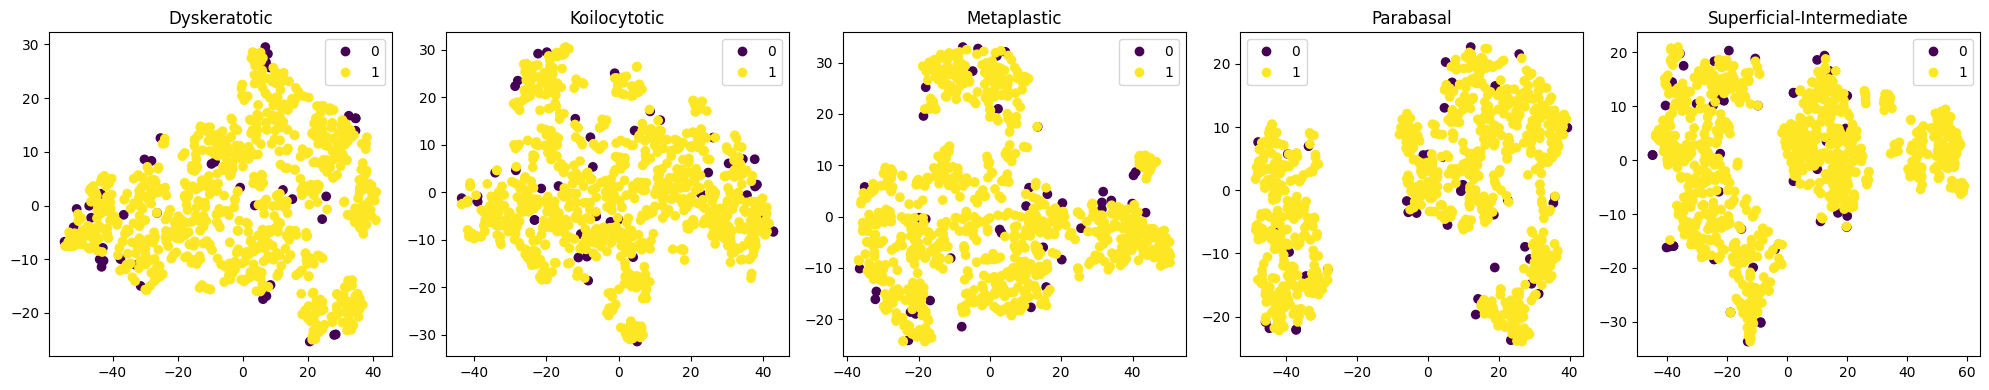

In [5]:
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from sklearn.manifold import TSNE

# Funcion que permite graficar en 2d la distribucion de los datos que se encuentran en multiples dimensiones
def tsne_plot(
    file_path,
    axs,
    title,
    index_plot
):
    df = pd.read_csv(file_path).drop("image_path", axis=1)

    # Separando features entre outliers e inliers
    X = df.drop('type', axis=1)
    y = df['type']
    
    # Ejecutar algoritmo t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    # Crear el plot
    scatter = axs[index_plot].scatter(
        x=X_tsne[:,0], 
        y=X_tsne[:,1], 
        c=y.apply(lambda x: 0 if x=="outlier" else 1),
        label=["outlier", "normal"] 
    )
    axs[index_plot].set(title=title)
    axs[index_plot].legend(*scatter.legend_elements())
    return axs
    

paths = [
    "MonografiaDataScience/tmp/lof_im_Dyskeratotic.csv",
    "MonografiaDataScience/tmp/lof_im_Koilocytotic.csv",
    "MonografiaDataScience/tmp/lof_im_Metaplastic.csv",
    "MonografiaDataScience/tmp/lof_im_Parabasal.csv",
    "MonografiaDataScience/tmp/lof_im_Superficial-Intermediate.csv"
]

# Creamos la figura y los subplots
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

# Capturamos la distribucion de datos
for index in range(5):
  path = paths[index]
  title = path.split("_")[-1].split(".")[0]
  axs = tsne_plot(
    path,
    axs,
    title,
    index
  )

# Ajustamos la distancia entre subplots
plt.tight_layout()

# Mostramos el gráfico
plt.show()

Se aprecia como los datos atípicos (outliers se encuentran en morado) se ubican en los extremos de la distribución de datos. Sin embargo, dado que la naturaleza de la base de datos son imágenes, sería interesante ver, por categoría, como son aquellas imágenes atípicas. 

## Descargando la base de datos de imágenes en entorno Colab
---
Se usa el mismo método del notebook "Extraccion de Caracteristicas" para descargar la base de datos de imágenes de Sipakmed

In [6]:
import json

# Cargar archivo JSON en una cadena
api_token = '{"username":"daniellpez2","key":"cdfc04075fcd22835f527b5f5fa40af7"}'

# Convertir cadena en un objeto JSON
api_token = json.loads(api_token)

# Crear archivo temporal que contiene el contenido de la cadena
with open('kaggle.json', 'w') as file:
    json.dump(api_token, file)

# Establecer variables de entorno para la API de Kaggle
import os
os.environ['KAGGLE_USERNAME'] = api_token['username']
os.environ['KAGGLE_KEY'] = api_token['key']

!pip install kaggle
!kaggle datasets download -d prahladmehandiratta/cervical-cancer-largest-dataset-sipakmed -p sipakmed --unzip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
100% 6.39G/6.40G [01:19<00:00, 87.1MB/s]
100% 6.40G/6.40G [01:19<00:00, 86.6MB/s]


## Visualización de Imágenes Atípicas por cada clase


In [25]:
# Funcion anonima que permite filtrar un dataframe basado en una condicion
filter = lambda condition, table: table[condition]

paths = [
    "MonografiaDataScience/tmp/lof_im_Dyskeratotic.csv",
    "MonografiaDataScience/tmp/lof_im_Koilocytotic.csv",
    "MonografiaDataScience/tmp/lof_im_Metaplastic.csv",
    "MonografiaDataScience/tmp/lof_im_Parabasal.csv",
    "MonografiaDataScience/tmp/lof_im_Superficial-Intermediate.csv"
]

dataframe_outliers_list = []

for path in paths:
  table = pd.read_csv(path)
  class_type = path.split("_")[-1].split(".")[0] 
  image_list = filter(table["type"] == "outlier", table)["image_path"].values
  row_list = [[elem, class_type] for elem in image_list]
  dataframe_outlier = pd.DataFrame(row_list, columns=["image_path", "class"])
  dataframe_outliers_list.append(dataframe_outlier)

dataframe_outliers = pd.concat(dataframe_outliers_list).reset_index().drop("index", axis=1)
dataframe_outliers

,image_path,class
0,/content/sipakmed/im_Dyskeratotic/im_Dyskerato...,Dyskeratotic
1,/content/sipakmed/im_Dyskeratotic/im_Dyskerato...,Dyskeratotic
2,/content/sipakmed/im_Dyskeratotic/im_Dyskerato...,Dyskeratotic
3,/content/sipakmed/im_Dyskeratotic/im_Dyskerato...,Dyskeratotic
4,/content/sipakmed/im_Dyskeratotic/im_Dyskerato...,Dyskeratotic
...,...,...
200,/content/sipakmed/im_Superficial-Intermediate/...,Superficial-Intermediate
201,/content/sipakmed/im_Superficial-Intermediate/...,Superficial-Intermediate
202,/content/sipakmed/im_Superficial-Intermediate/...,Superficial-Intermediate
203,/content/sipakmed/im_Superficial-Intermediate/...,Superficial-Intermediate


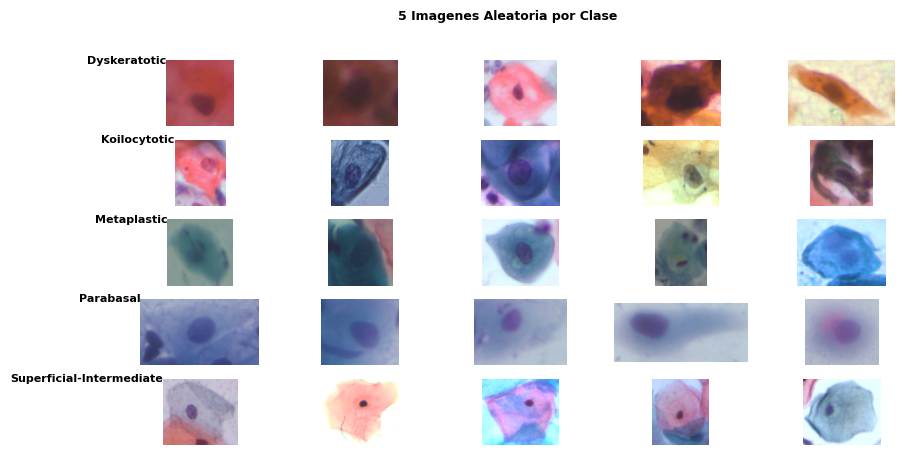

In [37]:
# Funcion que permite obtener el plot de las imagenes por categoria
def plot_images(df):
    # Obtener las clases
    classes = df['class'].unique()

    # Setear en plot
    fig, axes = plt.subplots(len(classes), 5, figsize=(10, 5))

    for i, cls in enumerate(classes):
        # Obtener 5 imagenes por clase
        images = df[df['class'] == cls]['image_path'].sample(5, random_state=0)

        for j, image_path in enumerate(images):
            # Cargar la imagen en el plot
            image = plt.imread(image_path)
            axes[i, j].imshow(image)
            axes[i, j].axis('off')

        # Agregar etiqueta de la clase
        axes[i, 0].text(-0.5, 0.5, cls, fontsize=8, fontweight='bold', ha='right', va='center')

    # Mostrar el plot
    fig.suptitle('5 Imagenes Aleatoria por Clase', fontsize=9, fontweight='bold')
    plt.show()


plot_images(dataframe_outliers)

Tras un análisis de las imágenes de las diferentes clases, se ha observado que, en general, las imágenes que presentan características atípicas, ya sea por su bajo nivel de contraste, sus formas elongadas o la presencia de pigmentos diminutos, no aportan la información esperada. Es importante tener en cuenta que estas irregularidades pueden dificultar la identificación precisa de los componentes presentes en las imágenes, lo que a su vez puede afectar la validez de los resultados obtenidos. Por tanto, sería recomendable filtrarlas del dataset de caracteristicas.

# Filtrando Datos Atípicos por Clase
En esta seccion se procedera a filtrar los datos atípicos de cada clase del dataset de características

In [39]:
read_csv = lambda path: pd.read_csv(path)
map = lambda list_, op: [op(elem) for elem in list_]
filter_outlier = lambda df: df[df["type"] != "outlier"]["image_path"]

paths = [
    "MonografiaDataScience/tmp/lof_im_Koilocytotic.csv",
    "MonografiaDataScience/tmp/lof_im_Dyskeratotic.csv",
    "MonografiaDataScience/tmp/lof_im_Metaplastic.csv",
    "MonografiaDataScience/tmp/lof_im_Parabasal.csv",
    "MonografiaDataScience/tmp/lof_im_Superficial-Intermediate.csv"
]

df_list = map(paths, read_csv) 
df_list_outliers = map(df_list, filter_outlier)
df_inliers = pd.concat(df_list_outliers)
original_data_without_outliers = pd.merge(table_features, df_inliers, on="image_path")
original_data_without_outliers

,class,image_path,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21
0,im_Superficial-Intermediate,/content/sipakmed/im_Superficial-Intermediate/...,183.323388,0.018020,0.028836,-917.959535,6.254622,20.068231,184.0,139.200186,...,23.040231,139.0,72.627459,0.013979,0.021424,5595.144120,6.293955,22.126087,67.0,124.324153
1,im_Superficial-Intermediate,/content/sipakmed/im_Superficial-Intermediate/...,186.047686,0.023454,0.079213,16033.627130,6.776816,39.819733,179.0,148.752417,...,41.342971,141.0,185.230083,0.021922,0.083143,-30604.651207,6.762042,34.669430,198.0,163.911240
2,im_Superficial-Intermediate,/content/sipakmed/im_Superficial-Intermediate/...,178.068636,0.022947,0.045504,-7910.307876,6.431249,24.560752,178.0,155.596777,...,26.812060,153.0,157.221446,0.019700,0.070152,-8125.133171,6.636741,30.095384,155.0,158.644256
3,im_Superficial-Intermediate,/content/sipakmed/im_Superficial-Intermediate/...,190.379236,0.029844,0.057215,-4221.604000,6.234412,20.254164,189.0,156.144607,...,18.226508,156.0,232.297087,0.025277,0.024731,-5571.572892,4.327503,10.288443,234.0,182.817624
4,im_Superficial-Intermediate,/content/sipakmed/im_Superficial-Intermediate/...,184.511240,0.024703,0.027122,-1554.618361,6.038195,17.793677,182.0,143.531488,...,22.069638,139.0,75.662645,0.018575,0.017502,1176.697080,5.739558,14.429489,72.0,127.906033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3839,im_Koilocytotic,/content/sipakmed/im_Koilocytotic/im_Koilocyto...,175.074277,0.008603,0.061783,-3173.779717,6.880100,30.633768,179.0,157.764194,...,41.544311,164.0,149.685950,0.007820,0.061631,-8291.064711,6.876288,30.824130,155.0,157.322624
3840,im_Koilocytotic,/content/sipakmed/im_Koilocytotic/im_Koilocyto...,153.119070,0.008760,0.023177,30218.789883,7.161531,44.634528,148.0,131.797934,...,50.459878,124.0,116.790971,0.007939,0.032149,44807.749176,7.110522,43.822961,108.0,129.744401
3841,im_Koilocytotic,/content/sipakmed/im_Koilocytotic/im_Koilocyto...,106.992107,0.008553,0.039428,53835.382760,7.053690,41.447707,94.0,134.266570,...,58.186251,116.0,114.638657,0.008171,0.070147,168772.638679,7.101753,56.548571,93.0,125.291756
3842,im_Koilocytotic,/content/sipakmed/im_Koilocytotic/im_Koilocyto...,111.661777,0.007846,0.027666,10323.250029,6.414168,24.813317,104.0,90.348120,...,28.378870,82.0,124.020289,0.007445,0.050579,5653.609055,6.662602,28.633825,119.0,102.844773


Analizando la cantidad de datos atipicos por clase


In [57]:
# Obteniendo data conteos por clase
filtered_data_series = original_data_without_outliers.groupby("class").agg('count')["image_path"]
original_data_series = table_features.groupby("class").agg('count')["image_path"]

# Transformando a dataframe
filtered_data_df =  pd.DataFrame(filtered_data_series).reset_index()
original_data_df = pd.DataFrame(original_data_series).reset_index()

# Renombrando las columnas
filtered_data_df.columns = ["class_filtered", "count_filtered"]
original_data_df.columns = ["class_original", "count_original"]
filtered_data_df = filtered_data_df.drop("class_filtered", axis=1)

# Concatenando la informacion
count_summary_df = pd.concat([filtered_data_df, original_data_df], axis=1)[["class_original", "count_original", "count_filtered"]]
count_summary_df["percentage_outliers"] = 100 - 100*count_summary_df["count_filtered"]/count_summary_df["count_original"]
count_summary_df

,class_original,count_original,count_filtered,percentage_outliers
0,im_Dyskeratotic,813,772,5.04
1,im_Koilocytotic,825,783,5.09
2,im_Metaplastic,793,753,5.04
3,im_Parabasal,787,747,5.08
4,im_Superficial-Intermediate,831,789,5.05


Después de un análisis exhaustivo de los datos recopilados, se ha observado que aproximadamente el 5% de los datos en cada una de las clases se consideran atípicos. Es importante destacar que este nivel de filtrado garantiza que los modelos que pueden entrenarse pueden operar aun con el comportamiento de la distribucion de mayor densidad de datos

Se materializa los datos filtrados en el entorno colab como archivo CSV, localizado en ```MonografiaDataScience/tmp/filtered_data.csv```.  De igual manera, se descarga el archivo CSV y se guarda de manera **manual** en el repositorio MonografiaDataScience en la subcarpeta tmp (esto debido a que Colab no tiene permiso para realizar push directos al repositorio), con el fin de guardar las caracteristicas extraidas, y usarlas en el siguiente notebook.

In [58]:
original_data_without_outliers.to_csv("MonografiaDataScience/tmp/filtered_data.csv", index=False)